# 任务一

In [1]:
%matplotlib inline
%load_ext watermark
%watermark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


2017-03-25T08:43:20

CPython 2.7.6
IPython 5.1.0

compiler   : GCC 4.8.4
system     : Linux
release    : 4.4.0-21-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


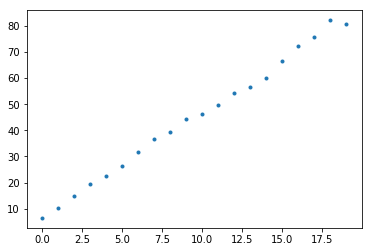

In [76]:
# 生成测试数据
size = 20
test_w, test_b = 4.0, 7.0
X = np.arange(20.0, step = 1.0, dtype=float)
Y = np.add(np.multiply(test_w, X), test_b)
Y = np.add(np.add(np.multiply(test_w, X), test_b), np.random.normal(scale=1.5, size=size))
plt.plot(X, Y, ".");


(4.0484066, 6.7765403)


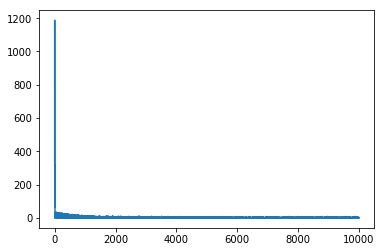

In [77]:
# 创建数据流图
tf.reset_default_graph()
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="w")
b = tf.Variable(tf.zeros([1]), name="b")
y_bar = w * x + b
init = tf.global_variables_initializer()
cost = tf.square(y_bar - y)
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
r = tf.random_uniform([1], dtype=tf.int32, seed = 26, minval=0, maxval=20)

# 要输出的变量
costs = [float("inf")]
w_val, b_val = 0.0, 0.0

# 迭代减少cost
with tf.Session() as sess:
    sess.run(init)
    for _ in range(10000):
        r_val = sess.run(r)
        feed_dict = {x: X[r_val], y: Y[r_val]}
        sess.run(train_step, feed_dict)
        w_val, b_val = sess.run([w, b])
        cost_val = sess.run(cost, feed_dict = feed_dict)
        # print([cost_val[0], w_val[0], b_val[0], X[r_val], Y[r_val]])
        costs.append(cost_val)
    # 将graph写入文件，可以用tensorboard --logdir /tensorflowstudy/graphs --port 6006来查看
    # writer = tf.summary.FileWriter('/tensorflowstudy/graphs', sess.graph)
# 打印最终的w和b，并且绘制cost收敛曲线
print((w_val[0], b_val[0]))
plt.plot(costs);

# 任务二
加了sigmoid后，假如用差值平方作为cost函数，那么当cost很大的时候，也就是当前的w和b跟正确值差很远的时候，cost函数的梯度很小。这样的话，刚开始学习的时候，w和b的变化很缓慢，需要迭代许多次才能收敛到正确值附近。 而使用交叉熵作为cost函数的话，cost越大，其梯度绝对值越大，也就是差的越远，学习越快。一般情况下，这正是我们想要的效果。

# 任务三

In [7]:
import numpy as np
x1Arr, x2Arr, yArr = np.loadtxt("data.csv", delimiter=',', usecols=(0, 1, 2), unpack=True)
print x1Arr
print x2Arr
print yArr

[ 0.3444989  -0.19248083  0.58272187  0.15154954  0.54508269 -0.93533281
  0.82811985 -0.56202701  0.81054082  0.07589885  1.97576047  0.97619784
 -0.71648268 -1.96211303  0.15520332  1.63410087 -0.3060828   0.8871369
  0.21747483  0.68080213 -0.83475     0.15326888 -0.1241012  -0.44405733
 -0.04820459 -1.9684155  -0.60521139 -0.04476193  1.93213397 -0.01405036
 -1.94553695 -0.65810955 -0.49877977  0.07737976  1.56107497  1.57334048
  0.00438465  0.1010124   0.66571676  0.49386651 -0.29097567 -1.96829995
  0.54367398  0.4352006   0.22282306 -1.53965421 -1.17541771  0.29305386
  0.51126824 -0.7457787   0.53373691  0.00369955 -0.46878346  1.35883079
 -1.03265469 -0.22433049  0.19874549 -0.73090818 -0.61320205 -0.90583372
 -0.07349328 -0.48067351 -0.87812433 -0.04412185 -0.31646631 -0.46897647
 -0.25601196  0.52788008  0.1514137   0.87849553 -0.31843259  0.85226829
 -0.6630513   0.38396391  0.95191875  1.68930501  1.91060699  1.40672333
 -0.82666631 -1.21530324  0.67476131  0.7446701   0.

#### 无隐层神经网络

(0.054546762, -0.06847313, -4.101481)


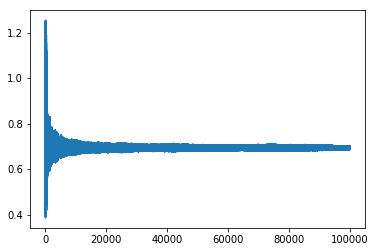

In [36]:
# 创建数据流图
tf.reset_default_graph()
x1 = tf.placeholder(dtype=tf.float32)
x2 = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
w1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="w1")
w2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="w2")
b = tf.Variable(tf.zeros([1]), name="b")
y_bar = tf.nn.sigmoid(w1 * x1 + w2 * x2  + b)
init = tf.global_variables_initializer()
cost = tf.losses.sigmoid_cross_entropy(y, y_bar)
#cost = tf.square(y_bar - y)
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
r = tf.random_uniform([1], dtype=tf.int32, seed = 26, minval=0, maxval=len(yArr))

# 要输出的变量
costs = [float("inf")]
w1_val, w2_val, b_val = 0.0, 0.0, 0.0

# 迭代减少cost
with tf.Session() as sess:
    sess.run(init)
    for _ in range(100000):
        r_val = sess.run(r)
        feed_dict = {x1: x1Arr[r_val], x2: x1Arr[r_val], y: yArr[r_val]}
        sess.run(train_step, feed_dict)
        w1_val, w2_val, b_val = sess.run([w1, w2, b])
        cost_val = sess.run(cost, feed_dict = feed_dict)
        # print([cost_val[0], w_val[0], b_val[0], X[r_val], Y[r_val]])
        costs.append(cost_val)
    # 将graph写入文件，可以用tensorboard --logdir /tensorflowstudy/graphs --port 6006来查看
    # writer = tf.summary.FileWriter('/tensorflowstudy/graphs', sess.graph)
# 打印最终的w和b，并且绘制cost收敛曲线
print((w1_val[0], w2_val[0], b_val[0]))
plt.plot(costs);

In [13]:
?tf.multiply

In [14]:
?tf.nn.sigmoid_cross_entropy_with_logits

(-0.96386057, 0.9136892, 0.028037086, -0.059651818, -0.46667191, -0.97268736, <tf.Tensor 'strided_slice:0' shape=() dtype=float32>, <tf.Tensor 'strided_slice_1:0' shape=() dtype=float32>, <tf.Tensor 'strided_slice_2:0' shape=() dtype=float32>)
0.5


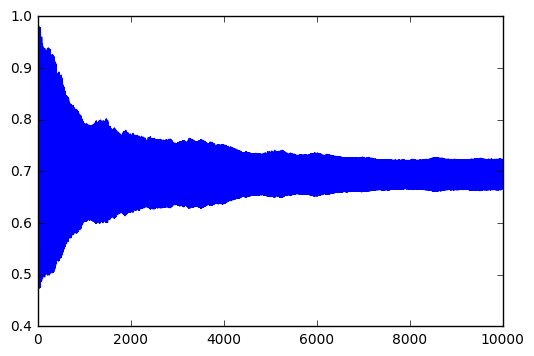

In [15]:
# 创建数据流图
tf.reset_default_graph()
x1 = tf.placeholder(dtype=tf.float32, name="x1")
x2 = tf.placeholder(dtype=tf.float32, name="x2")
y = tf.placeholder(dtype=tf.float32, name="y")
w11 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="w11")
w21 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="w21")
w12 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="w12")
w22 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="w22")
w1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="w1")
w2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="w2")

b1 = tf.Variable(tf.zeros([1]), name="b1")
b2 = tf.Variable(tf.zeros([1]), name="b2")
b = tf.Variable(tf.zeros([1]), name="b")
hidden_1 = tf.nn.tanh(tf.multiply(w11,x1) + tf.multiply(w21,x2) + b1)
hidden_2 = tf.nn.tanh(tf.multiply(w12,x1) + tf.multiply(w22,x2) + b2)
y_bar = tf.nn.sigmoid(tf.multiply(w1,hidden_1) + tf.multiply(w2, hidden_2)  + b)
init = tf.global_variables_initializer()
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_bar, labels=y)
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
r = tf.random_uniform([1], dtype=tf.int32, seed = 26, minval=0, maxval=len(yArr))

# 要输出的变量
costs = [float("inf")]
w11_val, w21_val, w12_val, w22_val, b1_val, b2_val, w1_val, w2_val, b_val = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

preds = []
# 迭代减少cost
with tf.Session() as sess:
    sess.run(init)
#     feed_dict = {x1: x1Arr, x2: x1Arr, y: yArr}
    for _ in range(10000):
        r_val = sess.run(r)
        feed_dict = {x1: x1Arr[r_val], x2: x1Arr[r_val], y: yArr[r_val]}
        sess.run(train_step, feed_dict)
        w11_val, w21_val, w12_val, w22_val, b1_val, b2_val, w1_val, w2_val, b_val = sess.run([w11, w21, w12, w22, b1, b2, w1, w2, b])
        cost_val = sess.run(cost, feed_dict = feed_dict)
        # print([cost_val[0], w_val[0], b_val[0], X[r_val], Y[r_val]])
        costs.append(cost_val)
    prods = sess.run(y_bar, feed_dict)
    # 将graph写入文件，可以用tensorboard --logdir /tensorflowstudy/graphs --port 6006来查看
    # writer = tf.summary.FileWriter('/tensorflowstudy/graphs', sess.graph)
# 打印最终的w和b，并且绘制cost收敛曲线
print((w11_val[0], w21_val[0], w12_val[0], w22_val[0], b1_val[0], b2_val[0], w1[0], w2[0], b[0]))
plt.plot(costs);

def accuracy(preds, labels):
    return ((preds > 0.5) == labels).sum() / float(len(labels))

print accuracy(preds, yArr)
#plot()


(array([[ 2.67115092,  5.69404793],
       [-5.15232038, -1.2891922 ],
       [ 3.86653328, -4.45991182]], dtype=float32), array([[ 7.02850962],
       [ 5.5597105 ],
       [ 5.53819227]], dtype=float32), array([[ 4.36394024,  4.97958517,  4.76839399]], dtype=float32), array([[-7.92743349]], dtype=float32))
0.95


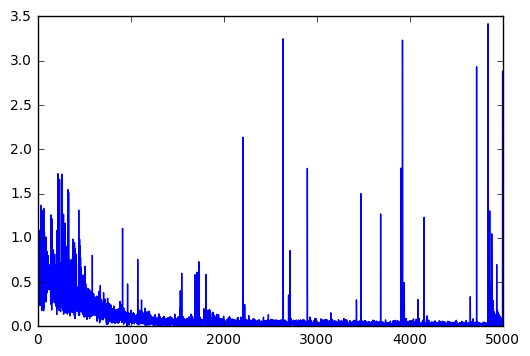

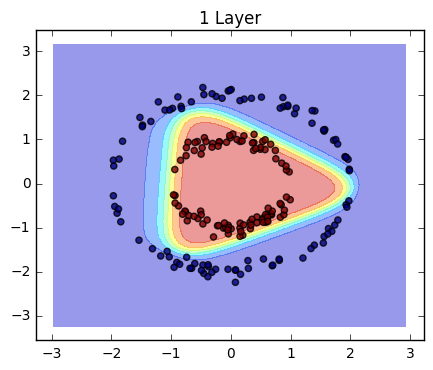

In [66]:
# 创建数据流图
tf.reset_default_graph()
hidden_count = 3
x = tf.placeholder(dtype=tf.float32, name="x")
y = tf.placeholder(dtype=tf.float32, name="y")
w1 = tf.Variable(tf.random_uniform([hidden_count, 2], -1.0, 1.0), name="w1")
b1 = tf.Variable(tf.zeros([hidden_count, 1]), dtype=tf.float32, name="b1")
w2 = tf.Variable(tf.random_uniform([1, hidden_count], -1.0, 1.0), dtype=tf.float32, name="w2")
b2 = tf.Variable(tf.zeros([1, 1]), dtype=tf.float32, name="b2")
hidden = tf.nn.tanh(tf.matmul(w1, x) + b1)
y_var_before_sig = tf.matmul(w2, hidden) + b2
y_bar = tf.nn.sigmoid(y_var_before_sig)
init = tf.global_variables_initializer()
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_var_before_sig, labels=y))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cost)
r = tf.random_uniform([1], dtype=tf.int32, seed = 26, minval=0, maxval=len(yArr))

# 要输出的变量
costs = [float("inf")]
w1_val, b1_val, w2_val, b2_val = None, None, None, None

preds = []
# 迭代减少cost
with tf.Session() as sess:
    sess.run(init)
#     feed_dict = {x: np.array([x1Arr, x2Arr]), y: yArr}
    for _ in range(5000):
        r_val = sess.run(r)
        feed_dict = {x : np.array([x1Arr[r_val], x2Arr[r_val]]), y: yArr[r_val]}
        
        sess.run(train_step, feed_dict)
        w1_val, b1_val, w2_val, b2_val = sess.run((w1, b1, w2, b2))
        cost_val = sess.run(cost, feed_dict = feed_dict)
        # print([cost_val[0], w_val[0], b_val[0], X[r_val], Y[r_val]])
        costs.append(cost_val)
    preds = sess.run(y_bar, {x : np.array([x1Arr, x2Arr]), y: yArr})
    # 将graph写入文件，可以用tensorboard --logdir /tensorflowstudy/graphs --port 6006来查看
    # writer = tf.summary.FileWriter('/tensorflowstudy/graphs', sess.graph)
# 打印最终的w和b，并且绘制cost收敛曲线
print((w1_val, b1_val, w2_val, b2_val))
plt.plot(costs);

def accuracy(preds, labels):
    return ((preds > 0.5) == labels).sum() / float(len(labels))

print accuracy(preds, yArr)

xtrain = np.array([x1Arr, x2Arr])
ytrain = yArr

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
#iris = datasets.load_iris()
#X = iris.data[:, [0, 2]]
#y = iris.target
# X.shape = 150, 2
X = xtrain.T
# y.shape = 150,
y = ytrain

# Training classifiers
#clf1 = DecisionTreeClassifier(max_depth=4)
#clf1.fit(X, y)

def sigmoid(x):
    return 1/(1+np.e ** (-x))

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))


temp = np.c_[xx.ravel(), yy.ravel()].T
M1L = np.tanh(W1L1.dot(temp) + b1L1)
M2L = sigmoid(W1L2.dot(M1L) + b1L2)


Z = M2L.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
axarr.set_title("1 Layer")

plt.show()


In [57]:
# ?tf.reshape

?tf.random_uniform

In [35]:
 np.array([1, 2])

array([1, 2])

In [38]:
np.array([x1Arr[r_val], x1Arr[r_val]]).shape

(2, 1)

In [49]:
np.array([x1Arr, x2Arr])[:,0]

array([ 0.3444989 ,  1.93518134])

In [48]:
print np.array([x1Arr, x2Arr])

TypeError: list indices must be integers, not tuple

In [52]:
len(yArr)

200

0.54
1.0
1.0
1.0
1.0
Automatically created module for IPython interactive environment


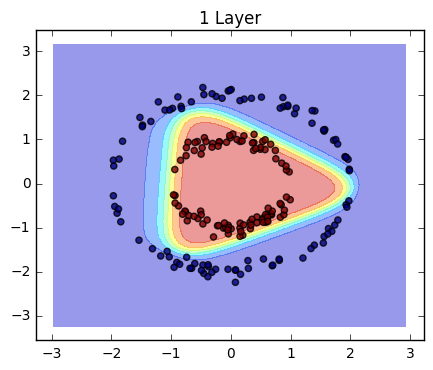

In [58]:
xtrain = np.array([x1Arr, x2Arr])
ytrain = yArr
x_placeholder = tf.placeholder('float')
y_placeholder = tf.placeholder('float')

n = 3

W1 = tf.Variable(tf.random_uniform([n, 2], -1.0, 1.0), dtype=tf.float32)
b1 = tf.Variable(tf.random_uniform([n, 1]), dtype=tf.float32)

W2 = tf.Variable(tf.random_uniform([1, n]), dtype=tf.float32)
b2 = tf.Variable(tf.random_uniform([1, 1], -1.0, 1.0), dtype=tf.float32)

hidden = tf.add(tf.matmul(W1, x_placeholder), b1)
nn_raw_output = tf.add(tf.matmul(W2, tf.tanh(hidden)), b2)
final_output = tf.sigmoid(nn_raw_output)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=nn_raw_output, labels=y_placeholder))


train_step = tf.train.GradientDescentOptimizer(0.3).minimize(cost)
costs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        # type 可以不指定形式，数据初始读入的时候已经指定
        feed_dict = {x_placeholder:xtrain.astype(float), y_placeholder:ytrain.astype(float)}
        sess.run(train_step, feed_dict=feed_dict)
        cost_value = sess.run(cost, feed_dict=feed_dict)
        costs.append(cost_value)
        if i % 200 == 0:
            preds = sess.run(final_output, feed_dict=feed_dict)
            print(accuracy(preds, ytrain))
    W1L1, b1L1 = (sess.run([W1, b1]))
    W1L2, b1L2 = (sess.run([W2, b2]))


print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
#iris = datasets.load_iris()
#X = iris.data[:, [0, 2]]
#y = iris.target
# X.shape = 150, 2
X = xtrain.T
# y.shape = 150,
y = ytrain

# Training classifiers
#clf1 = DecisionTreeClassifier(max_depth=4)
#clf1.fit(X, y)

def sigmoid(x):
    return 1/(1+np.e ** (-x))

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))


temp = np.c_[xx.ravel(), yy.ravel()].T
M1L = np.tanh(W1L1.dot(temp) + b1L1)
M2L = sigmoid(W1L2.dot(M1L) + b1L2)


Z = M2L.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
axarr.set_title("1 Layer")

plt.show()